### Categorical Features

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

One hot encoding. Когда ты заменяешь на вектор, значения а не прост оприписываешь какое-то числа


In [20]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype=int)
vec.fit_transform(data)


array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [21]:
vec.get_feature_names()


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

### Text Features

In [34]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']



In [31]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [32]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,exil,horizon,of,problem,queen
0,1,0,0,1,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derived Features

D:\Anaconda_3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Anaconda_3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


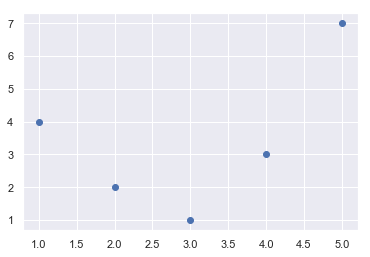

In [44]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])

plt.scatter(x, y)

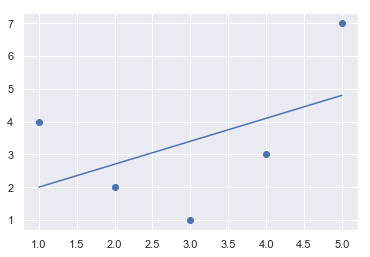

In [46]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x, yfit)

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False)
X2 = poly.fit_transform(X)
# создаем ещё столбики, соответсвнно с квадратами кубами и далее


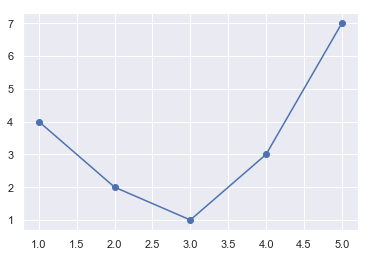

In [66]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, yfit)

### Imputation missing data

In [67]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [73]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=0)
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [83]:
model = LinearRegression().fit(X2, y)
model.predict(X2)


array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [90]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                             PolynomialFeatures(degree=2),
                             LinearRegression())


In [91]:
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
